In [1]:
#NUMPY ANALYSIS
from google.colab import files
uploaded = files.upload()


Saving Salaries.csv to Salaries.csv


In [2]:
import pandas as pd

# Load the CSV
df = pd.read_csv("Salaries.csv")

# View first few rows
df.head()


<ipython-input-2-f89353aeac12>:4: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Salaries.csv")


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
import numpy as np

# Convert necessary columns to numeric, handling errors and NaN
df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'], errors='coerce')
df['OtherPay'] = pd.to_numeric(df['OtherPay'], errors='coerce')
df['TotalPay'] = pd.to_numeric(df['TotalPay'], errors='coerce')

# Drop rows with NaN in these columns
df_clean = df.dropna(subset=['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay'])

# Convert to NumPy arrays
base_pay = df_clean['BasePay'].to_numpy()
overtime_pay = df_clean['OvertimePay'].to_numpy()
other_pay = df_clean['OtherPay'].to_numpy()
total_pay = df_clean['TotalPay'].to_numpy()


In [4]:
# Basic Statistics
print("Base Pay:")
print("Mean:", np.mean(base_pay))
print("Median:", np.median(base_pay))
print("Standard Deviation:", np.std(base_pay))
print("Min:", np.min(base_pay))
print("Max:", np.max(base_pay))

print("\nTotal Pay:")
print("Mean:", np.mean(total_pay))
print("Median:", np.median(total_pay))
print("Std Dev:", np.std(total_pay))


Base Pay:
Mean: 66325.44884048768
Median: 65007.45
Standard Deviation: 42764.491063809946
Min: -166.01
Max: 319275.01

Total Pay:
Mean: 75057.85104799217
Median: 71644.71
Std Dev: 50409.5909180947


In [5]:
# Correlation coefficient between BasePay and TotalPay
correlation = np.corrcoef(base_pay, total_pay)[0, 1]
print("\nCorrelation between Base Pay and Total Pay:", correlation)



Correlation between Base Pay and Total Pay: 0.9544936474296022


In [6]:
#MATPLOTLIB ANALYSIS

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Salaries.csv')

# Display first few rows
df.head()


<ipython-input-6-099927abbc85>:7: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Salaries.csv')


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [7]:
# Convert relevant columns to numeric
cols = ['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in pay columns
df = df.dropna(subset=cols)


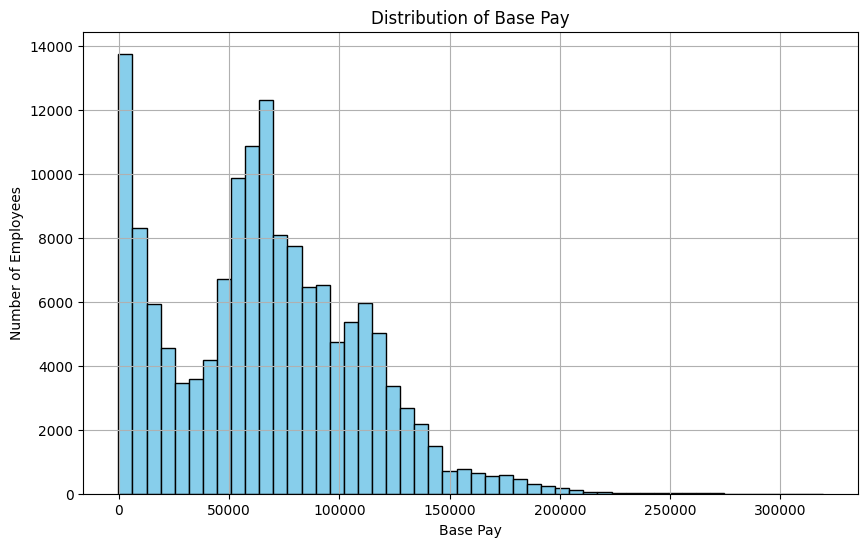

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df['BasePay'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Base Pay')
plt.xlabel('Base Pay')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()


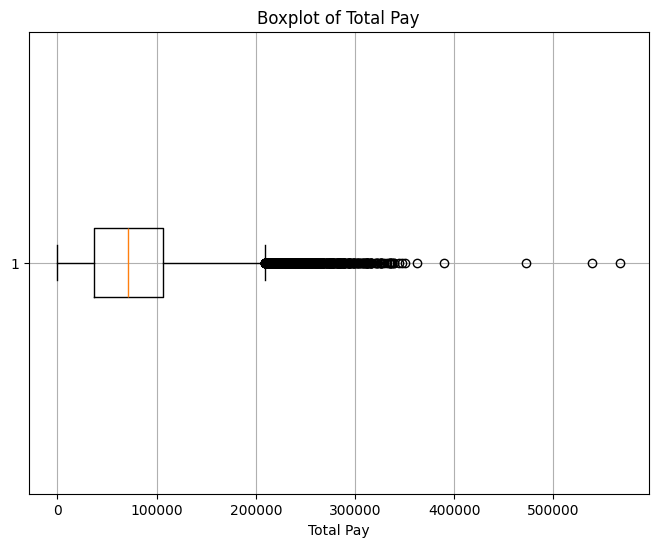

In [9]:
plt.figure(figsize=(8,6))
plt.boxplot(df['TotalPay'], vert=False)
plt.title('Boxplot of Total Pay')
plt.xlabel('Total Pay')
plt.grid(True)
plt.show()


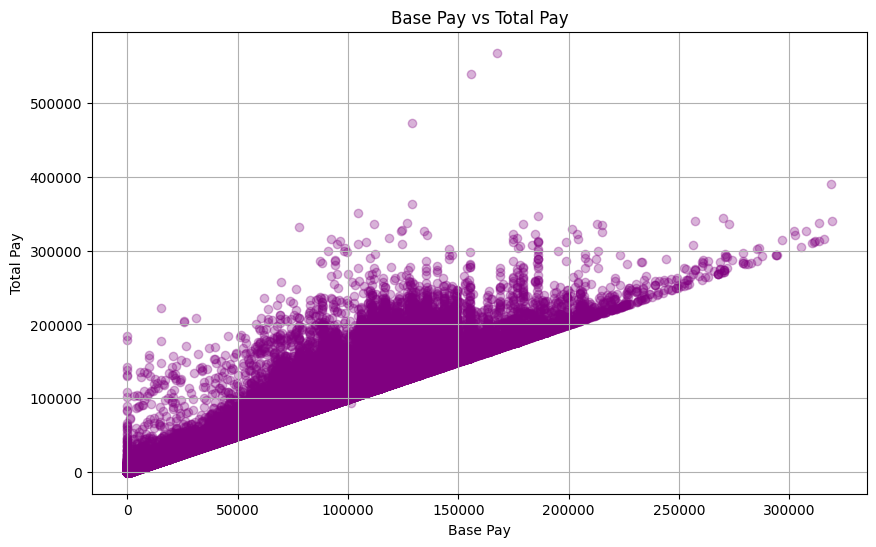

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df['BasePay'], df['TotalPay'], alpha=0.3, color='purple')
plt.title('Base Pay vs Total Pay')
plt.xlabel('Base Pay')
plt.ylabel('Total Pay')
plt.grid(True)
plt.show()


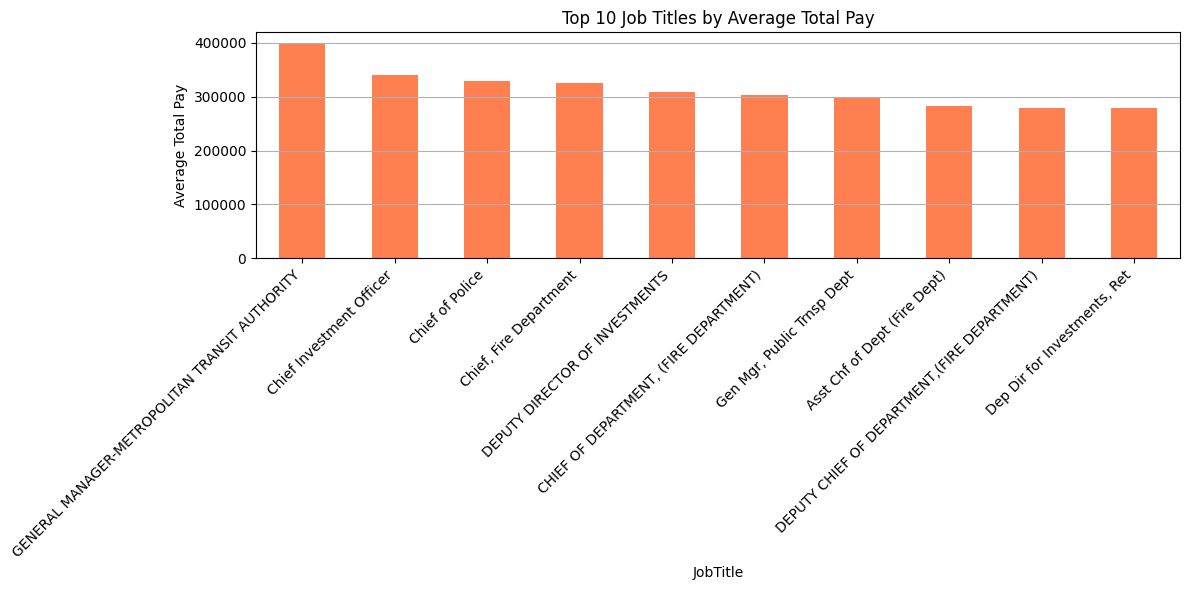

In [11]:
avg_pay_by_job = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
avg_pay_by_job.plot(kind='bar', color='coral')
plt.title('Top 10 Job Titles by Average Total Pay')
plt.ylabel('Average Total Pay')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


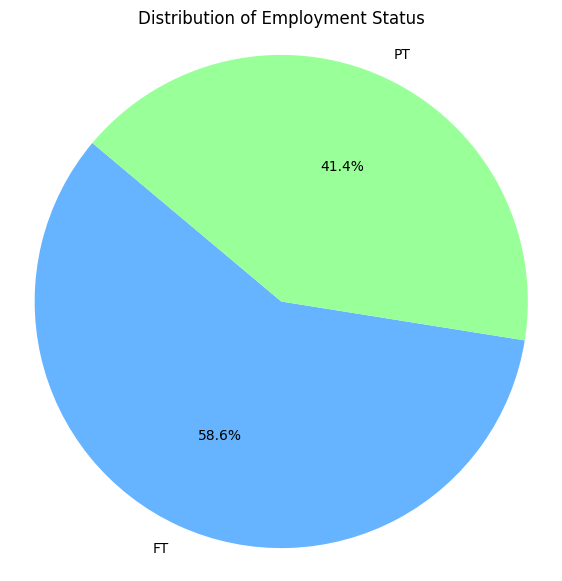

In [12]:
status_counts = df['Status'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Employment Status')
plt.axis('equal')
plt.show()


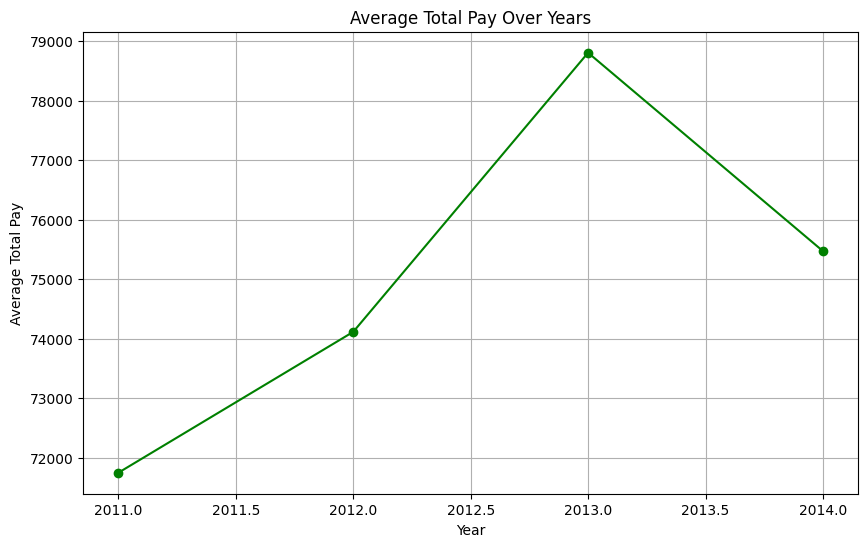

In [13]:
if 'Year' in df.columns:
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    avg_pay_by_year = df.groupby('Year')['TotalPay'].mean()

    plt.figure(figsize=(10,6))
    plt.plot(avg_pay_by_year.index, avg_pay_by_year.values, marker='o', linestyle='-', color='green')
    plt.title('Average Total Pay Over Years')
    plt.xlabel('Year')
    plt.ylabel('Average Total Pay')
    plt.grid(True)
    plt.show()


In [14]:
#PANDAS ANALYSIS

import pandas as pd

# Load the dataset
df = pd.read_csv('Salaries.csv')

# Display first 5 rows
df.head()


<ipython-input-14-3d2b0ac05cea>:6: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Salaries.csv')


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [15]:
# Basic info
df.info()

# Summary statistics for all numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [16]:
# Count of missing values in each column
df.isnull().sum()


,0
Id,0
EmployeeName,0
JobTitle,0
BasePay,605
OvertimePay,0
OtherPay,0
Benefits,36159
TotalPay,0
TotalPayBenefits,0
Year,0


In [17]:
# Convert numeric columns to proper types
for col in ['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing pay data
df_clean = df.dropna(subset=['BasePay', 'TotalPay'])


In [18]:
# Average and median Base Pay
avg_base = df_clean['BasePay'].mean()
median_base = df_clean['BasePay'].median()

# Highest Total Pay
max_total = df_clean['TotalPay'].max()
employee_max_total = df_clean[df_clean['TotalPay'] == max_total]

# Print results
print(f"Average Base Pay: {avg_base:.2f}")
print(f"Median Base Pay: {median_base:.2f}")
print(f"Maximum Total Pay: {max_total:.2f}")
print("Employee with Max Total Pay:")
print(employee_max_total[['EmployeeName', 'JobTitle', 'TotalPay']])


Average Base Pay: 66325.45
Median Base Pay: 65007.45
Maximum Total Pay: 567595.43
Employee with Max Total Pay:
     EmployeeName                                        JobTitle   TotalPay
0  NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  567595.43


In [20]:
#Aggregated Insights

In [21]:
#Top 10 Job Titles by Average Total Pay


top_jobs = df_clean.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10)
print("Top 10 Job Titles by Average Total Pay:")
print(top_jobs)


Top 10 Job Titles by Average Total Pay:
JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Chief Investment Officer                          339653.700000
Chief of Police                                   329183.646667
Chief, Fire Department                            325971.683333
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)            302377.730000
Gen Mgr, Public Trnsp Dept                        297769.413333
Asst Chf of Dept (Fire Dept)                      281763.483889
DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)      279359.560000
Dep Dir for Investments, Ret                      278592.545000
Name: TotalPay, dtype: float64


In [22]:
#Employees with Highest Base Pay
top_employees = df_clean.sort_values(by='BasePay', ascending=False).head(10)
print("Top 10 Employees by Base Pay:")
print(top_employees[['EmployeeName', 'JobTitle', 'BasePay']])


Top 10 Employees by Base Pay:
                EmployeeName                      JobTitle    BasePay
72925         Gregory P Suhr               Chief of Police  319275.01
110532            Amy P Hart             Asst Med Examiner  318835.49
72929          Robert L Shaw  Dep Dir for Investments, Ret  315572.01
72926   Joanne M Hayes-White        Chief, Fire Department  313686.01
72931      Harlan L Kelly-Jr   Executive Contract Employee  313312.52
72932          John L Martin                   Dept Head V  311758.96
110537         John L Martin                   Dept Head V  311298.55
110538     Harlan L Kelly-Jr   Executive Contract Employee  310161.02
110534        Gregory P Suhr               Chief of Police  307450.04
72933       Edward D Reiskin    Gen Mgr, Public Trnsp Dept  305307.89


In [23]:
# Number of Employees per Job Title
job_counts = df_clean['JobTitle'].value_counts().head(10)
print("Top 10 Most Common Job Titles:")
print(job_counts)


Top 10 Most Common Job Titles:
JobTitle
Transit Operator                6975
Special Nurse                   4382
Registered Nurse                3725
Public Svc Aide-Public Works    2514
Police Officer 3                2411
Custodian                       2409
TRANSIT OPERATOR                2388
Firefighter                     2348
Recreation Leader               1968
Patient Care Assistant          1940
Name: count, dtype: int64


In [24]:
#Outlier Detection
# Outliers: Base Pay > 300,000 or Total Pay > 500,000
outliers = df_clean[(df_clean['BasePay'] > 300000) | (df_clean['TotalPay'] > 500000)]
print("Outliers in BasePay or TotalPay:")
print(outliers[['EmployeeName', 'JobTitle', 'BasePay', 'TotalPay']])


Outliers in BasePay or TotalPay:
                EmployeeName                                        JobTitle  \
0             NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1               GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
36160           Gregory Suhr                                 Chief of Police   
72925         Gregory P Suhr                                 Chief of Police   
72926   Joanne M Hayes-White                          Chief, Fire Department   
72929          Robert L Shaw                    Dep Dir for Investments, Ret   
72931      Harlan L Kelly-Jr                     Executive Contract Employee   
72932          John L Martin                                     Dept Head V   
72933       Edward D Reiskin                      Gen Mgr, Public Trnsp Dept   
110532            Amy P Hart                               Asst Med Examiner   
110534        Gregory P Suhr                                 Chief of Police   
110535 